# Preprocessing Optimisation

In [1]:
%matplotlib inline

import os
import random

from matplotlib import pyplot as plt

import seaborn as sns

import numpy as np
import pandas as pd
import cv2

In [2]:
# get the list of filenames in a given directory

camera_view = 'KL11-E1DC'

availible_ids = [int(file.split('.')[0])
                 for file in os.listdir(f"./data/real/{camera_view}/") 
                 if file.endswith(".png")]

print(f'number of unique images: {len(availible_ids)}')
print(f'number of pairs: {len(availible_ids)*len(availible_ids)-1}')

number of unique images: 109
number of pairs: 11880


Some functions that are used throughout this notebook. Including functions that plot a range of parameters on a grid of graphs and also returns a value for the variance of the Laplacian/Fourier transforms.

In [17]:
# some helper functions
def load_img(img_id):
    return cv2.imread(f'./data/{camera_view}/{img_id}.png', 
                      cv2.IMREAD_GRAYSCALE)


def plot_two(img_a, name_a, img_b, name_b):
    plt.figure(1, figsize=(13,13))
    
    plt.subplot(121)
    plt.title(name_a)
    plt.imshow(img_a)

    plt.subplot(122)
    plt.title(name_b)
    plt.imshow(img_b)
    
    plt.show()


def plot_three(imgs, names):
    # there is probably a better way...
    plt.figure(1, figsize=(17,10))
    
    for i in range(3):
        
        plt.subplot(131 + i)
        plt.title(names[i])
        plt.imshow(imgs[i])
    
    plt.show()

    

def map_2_params_Laplace(img, _operation, x_params, x_param_name, y_params, y_param_name):
    """ 
    Makes a 2D grid of plots by applying the function '_operation' to 'img'
    accross the parameter space defined in the other arguments
    """
    # set up axes
    fig, axs = plt.subplots(nrows=len(x_params), 
                            ncols=len(y_params),
                            sharex='col', sharey='row',
                            figsize=(15,15.4))
    
    #Compute the variance of the Laplacian
    

    # loop through axes and make each plot
    for i, x_param in enumerate(x_params):        
        for j, y_param in enumerate(y_params):
            
            # plot image with these parameters
            axs[j,i].imshow(_operation(img, x_param, y_param))
            #axs[j,i].imshow(cv2.Canny(_operation(img, x_param, y_param), 80, 140, apertureSize=3, L2gradient=True))
            Laplace = cv2.Laplacian(_operation(img, x_param, y_param), cv2.CV_64F).var()
            
            # decide whether or not to label axes
            if j == 0:
                axs[j,i].set_title(f'{x_param_name} = {x_param:.2f}')
            if i == 0:
                axs[j,i].set_ylabel((f'{y_param_name} = {y_param:.2f}'), fontsize=12)
            
            #Show the variance of the Laplacian
            axs[j,i].set_xlabel((f'Variance = {Laplace:.2f}'))
            
            # tick hiding
            axs[j,i].tick_params(
                bottom=False,
                left=False,
                labelbottom=False,
                labelleft=False)
    
    # title
    fig.text(0.5, 0.92, f'Applying {_operation.__name__}()', ha='center', va='center', fontsize=14)
    
    # formatting
    fig.subplots_adjust(hspace=0.1, wspace=0.1)
    
def map_2_params_Fourier(img, _operation, x_params, x_param_name, y_params, y_param_name):
    """ 
    Makes a 2D grid of plots by applying the function '_operation' to 'img'
    accross the parameter space defined in the other arguments
    """
    # set up axes
    fig, axs = plt.subplots(nrows=len(x_params), 
                            ncols=len(y_params),
                            sharex='col', sharey='row',
                            figsize=(15,15.4))
    
    #Compute the variance of the Laplacian
    

    # loop through axes and make each plot
    for i, x_param in enumerate(x_params):        
        for j, y_param in enumerate(y_params):
            
            # plot image with these parameters
            axs[j,i].imshow(_operation(img, x_param, y_param))
            #axs[j,i].imshow(cv2.Canny(_operation(img, x_param, y_param), 80, 140, apertureSize=3, L2gradient=True))
            Fourier = np.fft.fft2(_operation(img, x_param, y_param)).var()
            
            # decide whether or not to label axes
            if j == 0:
                axs[j,i].set_title(f'{x_param_name} = {x_param:.2f}')
            if i == 0:
                axs[j,i].set_ylabel((f'{y_param_name} = {y_param:.2f}'), fontsize=12)
            
            #Show the variance of the Laplacian
            axs[j,i].set_xlabel((f'Variance = {Fourier:.2f}'))
            
            # tick hiding
            axs[j,i].tick_params(
                bottom=False,
                left=False,
                labelbottom=False,
                labelleft=False)
    
    # title
    fig.text(0.5, 0.92, f'Applying {_operation.__name__}()', ha='center', va='center', fontsize=14)
    
    # formatting
    fig.subplots_adjust(hspace=0.1, wspace=0.1)

Widely used function in openCV that corrects the contrast of images.

In [18]:
def correct_contrast(img, clip_limit=3, tile_size=7):
    
    # create the object
    clahe = cv2.createCLAHE(clipLimit=clip_limit, 
                            tileGridSize=(tile_size, tile_size))
    
    # apply equalisation
    return clahe.apply(img)

Choose a predetermined image. A low contrast image is used for the first part of the notebook but later random images are used to demonstrate its versaltility so far.

In [19]:
# clear
#img_id = 92182

# low contrast
img_id = 89065

# plasma blurry
#img_id = 89463

# plasma noisy
#img_id = 90469

# another one
#img_id = 90114

img_raw = cv2.imread(f'./data/real/KL11-E1DC/{img_id}.png', cv2.IMREAD_GRAYSCALE)

## Gaussian Subsampling

Not much visible change to this low contrast, high noise image - except for a decrease in brightness.

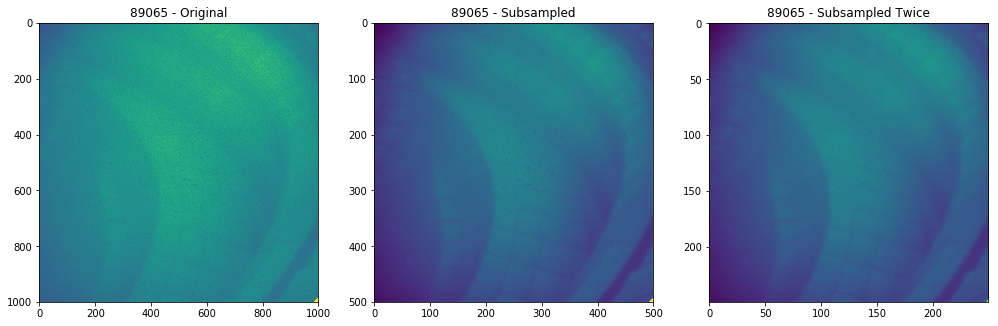

In [122]:
# downsample
downsampled = cv2.pyrDown(img_raw)
downsampled_twice = cv2.pyrDown(downsampled)

s = f'{img_id} - '
plot_three([img_raw, downsampled, downsampled_twice], 
           [s+'Original',s+'Subsampled',s+'Subsampled Twice'])

## More techniques

These two filters are widely used on various images to help eliminate unwanted blur, sharpen an image etc.

In [123]:
# wrap opencv functions so they are compatible with plots
def bilateral_filter(img, filter_size=5, sigma=70):
    
    # it's not clear exactly what the parameters represent in the docs...
    # (the sigmaSpace parameter appears to be superfluous)
    return cv2.bilateralFilter(img, d=filter_size,
                               sigmaColor=sigma,
                               sigmaSpace=sigma)

def nlm_filter(img, strength=2.5, window_size=6):
    return cv2.fastNlMeansDenoising(img, h=strength, searchWindowSize=window_size)

As a way of measuring the blurryness of an image and therefore its 'quality', we can use the variance of the Laplacian function. The higher the variance, the less blurry the image is. Here are some examples using the individual filters.

## nlm filter

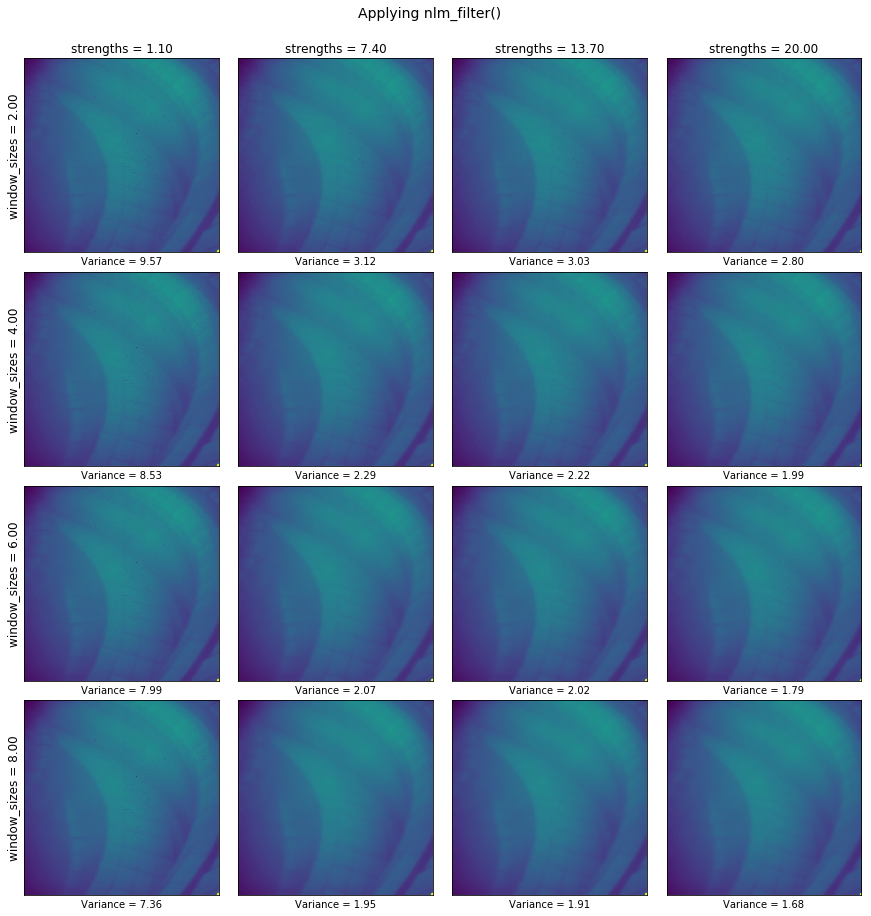

In [22]:
# set parameter space
strengths = np.linspace(1.1, 20, num=4)
window_sizes = range(2,10,2)

# scan parameter space
map_2_params_Laplace(downsampled, nlm_filter,
             strengths, 'strengths', 
             window_sizes, 'window_sizes')

## Bilateral Filter

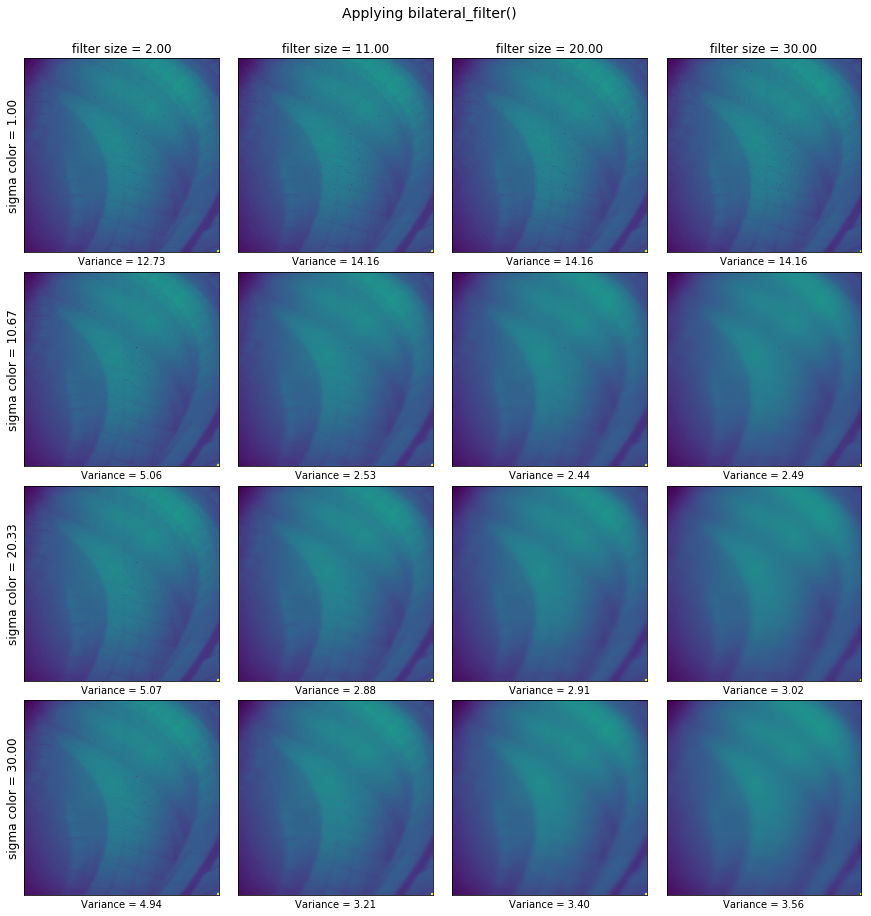

In [14]:
# set parameter space
filter_sizes = np.linspace(2, 30, num=4).astype(int)
sigma_colors = np.linspace(1, 30, num=4)

# scan parameter space
map_2_params_Laplace(downsampled, bilateral_filter, 
             filter_sizes, 'filter size', 
             sigma_colors, 'sigma color')

It is not clear to see from this whether we are getting anywhere, so below I try to use our LSD technique on these preprocessed images.

## Optimal ordering for random images

Just using the default parameters for the filters and applying them in different orders gives us different results and the variance of the Laplacian does well to identify the one that looks the best suited for line segment detection.

In [97]:
def get_one_ordered_pp(img, l, i):
    pp_functions = l[i]

    for pp in pp_functions:
        img = pp(img)
    
    functions = [func for func in pp_functions]
    ordering = [str(func).split(' ')[1] for func in pp_functions]
    Laplace = cv2.Laplacian(img, cv2.CV_64F).var()
    
    return img, functions, ordering, Laplace

This function plots all different orderings of the filters and also returns the optimum values for a given image.

In [98]:
def map_2_params_ordering(img, operations):
    """ 
    Makes a 2D grid of plots by applying the function '_operation' to 'img'
    accross the parameter space defined in the other arguments
    """
    nrows = 2
    ncols = 3
    k = 0
    optimumLap = 0
    optimumOrder = []
    optimumFunctions = []
    
    # set up axes
    fig, axs = plt.subplots(nrows, 
                            ncols,
                            sharex='col', sharey='row',
                            figsize=(15,15.4))
    
    # loop through axes and make each plot
    for i in range(0, ncols):       
        for j in range(0, nrows):
            
            imgs, functions, ordering, Laplace = get_one_ordered_pp(img, operations, k)
            
            if(Laplace > optimumLap):
                optimumLap = Laplace
                optimumOrder = ordering
                optimumFunctions = functions
            # plot image with these parameters
            axs[j,i].imshow(imgs)
            #axs[j,i].imshow(cv2.Canny(_operation(img, x_param, y_param), 80, 140, apertureSize=3, L2gradient=True))
            
            # decide whether or not to label axes
            axs[j,i].set_title(ordering)
    
            #Show the variance of the Laplacian
            axs[j,i].set_xlabel((f'Variance = {Laplace:.2f}'))
            
            # tick hiding
            axs[j,i].tick_params(
                bottom=False,
                left=False,
                labelbottom=False,
                labelleft=False)
            k += 1
            
    fig.subplots_adjust(hspace=0.1, wspace=0.2)
    return fig, optimumLap, optimumFunctions, optimumOrder

In [99]:
def optimum(img, order):
    for pp in order:
        img = pp(img)
    return img

In [100]:
def lsd(img, scale=None, sigma_scale=None, return_raw=False, return_lines=False):
    """wrapper for opencv's line segment detection functionality"""
    
    # if we don't specify parameters, leave the defaults
    if scale is None and sigma_scale is None:
        lsd = cv2.createLineSegmentDetector(_refine=cv2.LSD_REFINE_STD)
    
    # otherwise use our settings
    else:
        lsd = cv2.createLineSegmentDetector(_refine=cv2.LSD_REFINE_STD,
                                            _scale=scale,
                                            _sigma_scale=scale)
        
    # detect line segments
    _lines, width, prec, nfa = lsd.detect(img) 
    

    if return_lines:
        # just return a numpy array of line
        return _lines
    
    if return_raw:
        # draw lines on top of the raw image
        return lsd.drawSegments(downsampled, _lines)
    
    else:
        # draw lines on top of the preprocessed image
        return lsd.drawSegments(img, _lines)

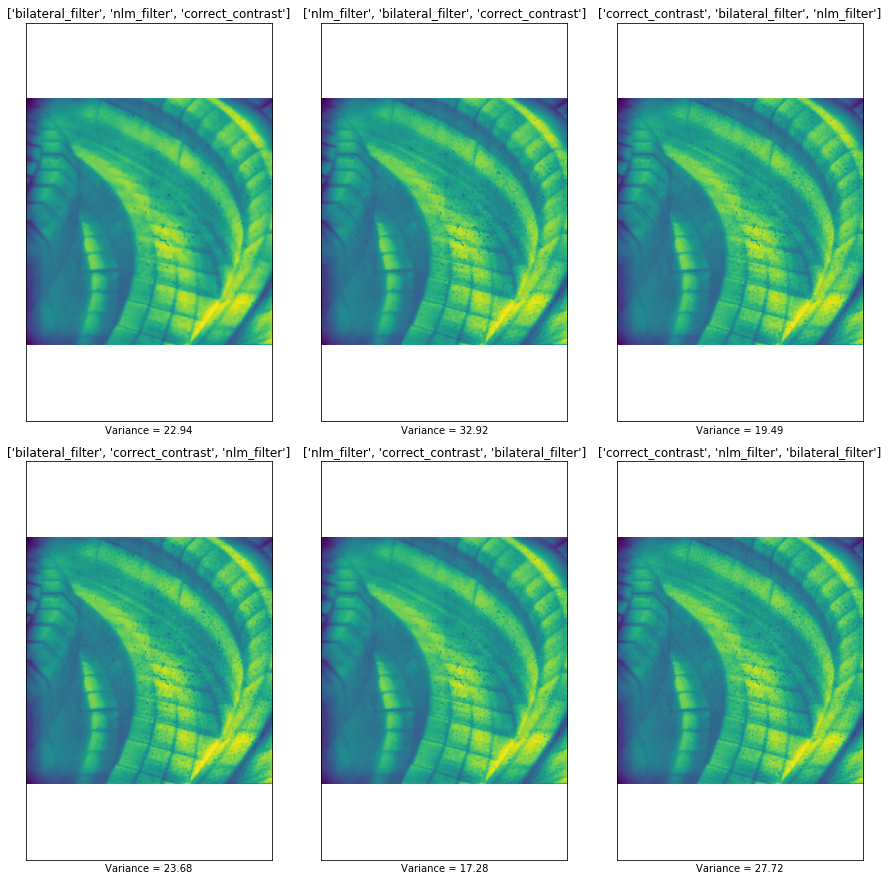

In [101]:
import itertools
random_id = random.choice(availible_ids)
img = cv2.imread(f'./data/real/KL11-E1DC/{random_id}.png', cv2.IMREAD_GRAYSCALE)
img = cv2.pyrDown(img)

pp_functions = [bilateral_filter, nlm_filter, correct_contrast]
l = list(itertools.permutations(pp_functions))

# process images in a random order
fig, optimumLap, optimumFunctions, optimumOrder = map_2_params_ordering(img, l)

Below, the function finds the optimum image using the default function values and then fits line segment detection to this image.

In [107]:
def find_optimum_ordering(img, operations):
    """ 
    Makes a 2D grid of plots by applying the function '_operation' to 'img'
    accross the parameter space defined in the other arguments
    """
    nrows = 2
    ncols = 3
    k = 0
    optimumLap = 0
    optimumOrder = []
    optimumFunctions = []

    # loop through axes and make each plot
    for i in range(0, ncols):       
        for j in range(0, nrows):
            
            imgs, functions, ordering, Laplace = get_one_ordered_pp(img, operations, k)
            
            if(Laplace > optimumLap):
                optimumLap = Laplace
                optimumOrder = ordering
                optimumFunctions = functions
            k += 1

    return optimumLap, optimumFunctions, optimumOrder

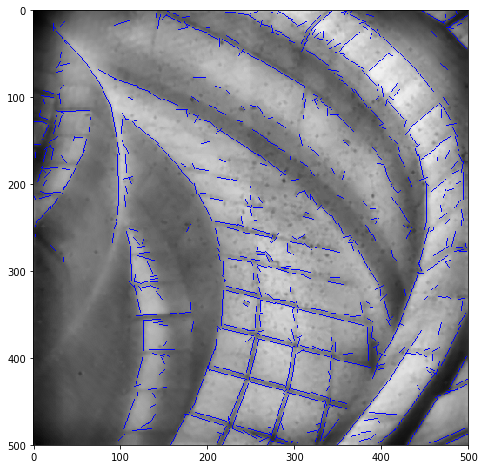

In [119]:
import itertools
random_id = random.choice(availible_ids)
img = cv2.imread(f'./data/real/KL11-E1DC/{random_id}.png', cv2.IMREAD_GRAYSCALE)
img = cv2.pyrDown(img)

pp_functions = [bilateral_filter, nlm_filter, correct_contrast]
l = list(itertools.permutations(pp_functions))

optimumLap, optimumFunctions, optimumOrder = find_optimum_ordering(img, l)

lines_1 = lsd(optimum(img, optimumFunctions), 0.9, 0.1)

plt.figure(1, figsize=(8,8))
plt.imshow(lines_1)

As we can see the LSD works pretty well for any random image, and could be improved using post processing as we saw a little of last week. Below I have an example of one that didn't work as well but obviously, this still looks usable.

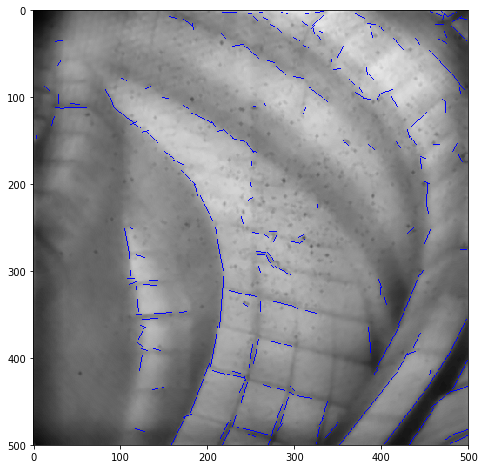

In [121]:
import itertools
random_id = random.choice(availible_ids)
img = cv2.imread(f'./data/real/KL11-E1DC/{random_id}.png', cv2.IMREAD_GRAYSCALE)
img = cv2.pyrDown(img)

pp_functions = [bilateral_filter, nlm_filter, correct_contrast]
l = list(itertools.permutations(pp_functions))

optimumLap, optimumFunctions, optimumOrder = find_optimum_ordering(img, l)

lines_1 = lsd(optimum(img, optimumFunctions), 0.9, 0.1)

plt.figure(1, figsize=(8,8))
plt.imshow(lines_1)

## Problems with using the variance

After looking at the images produced above using a single filter for a while, I think that we have a problem regarding the forground hairs, dirt and whatever else is present on the lens or in the optics.
    
The problem I think is that we have to blur the image slightly to help reduce the effect of this unwanted debris. Then from this bring it back into a sharper format to which we can apply our feature detection. If this is the case, the variance is not a great way of measuring the ideal parameters of the intermediate steps when applying these filters.
    
So the only way we could use the variance as an indicator of which intermediate parameters to use is if we had a function that maximised the variance in the final output but would have to go through potentially millions of different sets of parameters in the process (since there are two different filters). Obviously this is not very efficient and the enhanced output from a universal default may not be worth the computational time and power it would take to run.

## Potential solution

One potential solution might be to train an ML algorithm to choose a set of parameters based on it's original variance. Below, I present a very VERY primodial trial of the feasibility of this.

In [124]:
# clear
img_clear = 92182

# low contrast
img_lcontrast = 89065

# plasma blurry
img_blur = 89463

# plasma noisy
img_noise = 90469

# another one
img_predict = 90114

In [130]:
imagenames = [img_clear, img_lcontrast, img_blur, img_noise, img_predict]
images = []
for image in imagenames:
    images.append(cv2.imread(f'./data/real/KL11-E1DC/{image}.png', cv2.IMREAD_GRAYSCALE))

variances = []

for img in images:
    variances.append(cv2.Laplacian(img, cv2.CV_64F).var())
    
variances


[2785.2494840735635,
 429.48494190758407,
 1937.7156359899991,
 7824.9154061607787,
 2855.897308599664]

So from this, we would expect the img_predict to be most similar to the clear image...

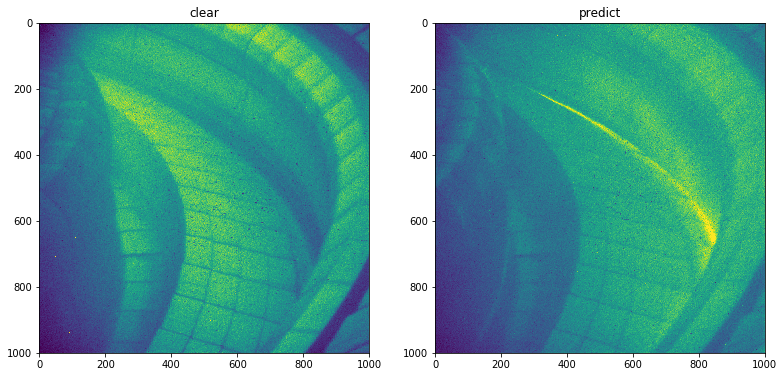

In [133]:
plot_two(images[0], 'clear', images[4], 'predict')

And to compare, we can look at the other images next to our predict image...

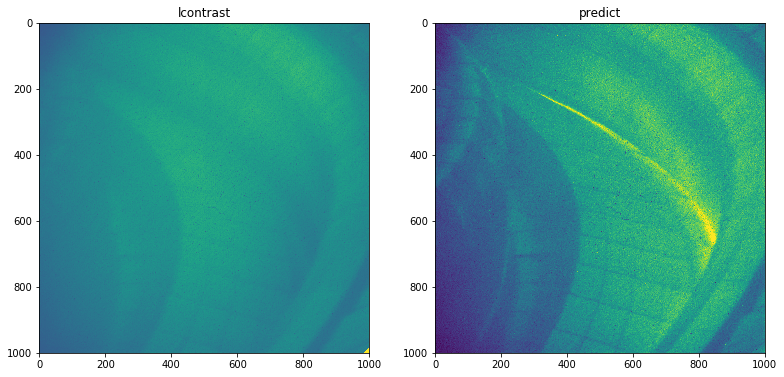

In [134]:
plot_two(images[1], 'lcontrast', images[4], 'predict')

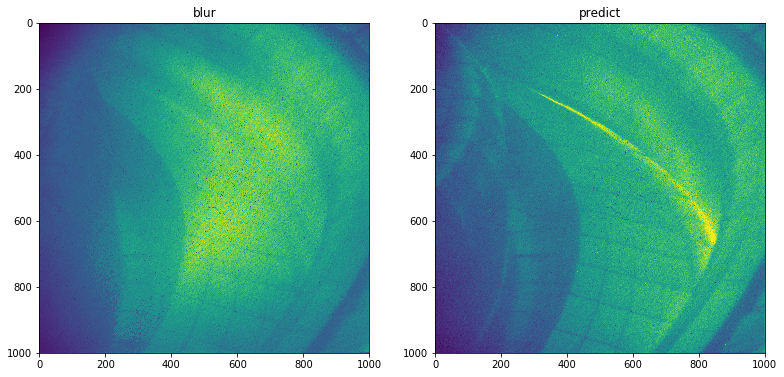

In [135]:
plot_two(images[2], 'blur', images[4], 'predict')

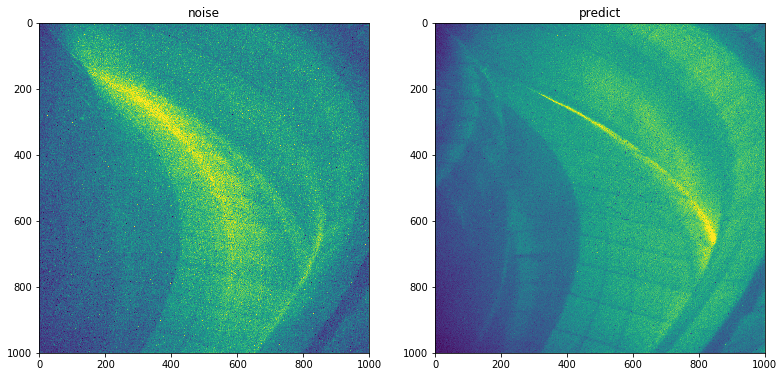

In [136]:
plot_two(images[3], 'noise', images[4], 'predict')

Not too bad! To me, I would say that the predict image is most similar to the clear image and the variance is reflecting that. So this could be a very real way of fully optimising the preprocessing of our images using machine learning.

## For next week...

I plan to write a code that optimises the individual preprocessing parameters for the image to see if it gives any visible improvements from just the optimal ordering of the filters. If the results are positive, then we can start to look at using a clustering machine learning algorithm to classify each image and use predetermined optimum parameters for each class.

Also, I have focussed on the bilateral filters and nlm filters from last week so I also want to explore the potential of other filters and techniques.